In [80]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

In [91]:
## 设置属性防止中文乱码
mpl.rcParams['font.sans-serif'] = [u'SimHei']
mpl.rcParams['axes.unicode_minus'] = False

In [81]:
# 加载数据
iris = pd.read_csv(filepath_or_buffer='./datas/iris.data',header=None)
X = np.asarray(iris[list(range(0,4))])
Y = np.asarray(iris[4])
# 数据清洗、处理
# 将Y目标属性中的字符串值转化为0.1，2.。。
# 此处用一种新的方法
Y = pd.Categorical(Y).codes
print('总样本个数：%d，特征属性个数：%d' %X.shape)

总样本个数：150，特征属性个数：4


In [13]:
# 这里介绍下Categorical
W = ['A','B','C','A']
W = pd.Categorical(W).codes

array([0, 1, 2, 0], dtype=int8)

In [16]:
# 训练集和测试集划分
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 214)
print('训练集上的样本数目：%d，测试集样本数目：%d'%(X_train.shape[0],X_test.shape[0]))

训练集上的样本数目：120，测试集样本数目：30


In [22]:
# 模型对象构建
# 决策树分类模型
model = DecisionTreeClassifier(criterion='gini',max_depth=5,random_state=214)

In [23]:
# 模型训练
model.fit(X_train,Y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=214,
            splitter='best')

In [32]:
# 模型效果评估
print('训练集上准确率：{}'.format(model.score(X_train,Y_train)))
print('测试集上准确率：{}'.format(model.score(X_test,Y_test)))
print('数据集目标属性：{}'.format(model.classes_))
print('数据集上个特征属性的权重系数,值越大，对目标属性的影响越大：{}'.format(model.feature_importances_))

训练集上准确率：1.0
测试集上准确率：0.9333333333333333
数据集目标属性：[0 1 2]
数据集上个特征属性的权重系数,值越大，对目标属性的影响越大：[ 0.          0.03335418  0.57273615  0.39390967]


In [28]:
# 自己实现准确率评估
Y_predict_test = model.predict(X_test)
result = (Y_predict_test == Y_test)
print('准确率：{}'.format(np.mean(result)))

准确率：0.9333333333333333


In [44]:
# 知识点
# 1-6.9均匀的产生三个数
t1 = np.linspace(1,6.9,3)
t2 = np.linspace(2.0,11.0,3)
# 生成网格采样点
x1,x2 = np.meshgrid(t1,t2)
# 转换为1维数组
x1 = x1.reshape(-1)
x2 = x2.reshape(-1)
print(t1)
print(t2)
print(x1)
print(x2)

[ 1.    3.95  6.9 ]
[  2.    6.5  11. ]
[ 1.    3.95  6.9   1.    3.95  6.9   1.    3.95  6.9 ]
[  2.    2.    2.    6.5   6.5   6.5  11.   11.   11. ]


In [49]:
# flat是numpy中的属性，功能是将numpy数组转换为一维的数组形式，也就是扁平化操作。 和reshape功能差不多
np.dstack((x1.flat,x2.flat)).shape

(1, 9, 2)

In [129]:
# 可视化操作
N = 100 # 横纵各采样100个值
# 获取第三个特征属性和第四个特征属性的最小值和最大值
x1_max = np.max(X[:,2])
x1_min = np.min(X[:,2])
x2_max = np.max(X[:,3])
x2_min = np.min(X[:,3])
print(x1_max, x1_min,x2_max,x2_min)
# 等距离从最大值和最小值之间产生100个点
t1 = np.linspace(x1_min,x1_max,N)
t2 = np.linspace(x2_min,x2_max,N)
# 生成网格采样点
x1, x2 = np.meshgrid(t1,t2)
x_show = np.dstack((x1.flat,x2.flat))[0]
# 重新训练模型，生成预测值
model.fit(X_train[:,:-2],Y_train)
y_show = model.predict(x_show)

[[ 5.6  2.7  4.2  1.3]
 [ 6.8  2.8  4.8  1.4]
 [ 6.3  2.9  5.6  1.8]
 [ 6.4  3.2  4.5  1.5]
 [ 5.7  4.4  1.5  0.4]
 [ 6.7  3.1  4.4  1.4]
 [ 6.3  2.8  5.1  1.5]
 [ 7.7  3.   6.1  2.3]
 [ 5.5  2.4  3.8  1.1]
 [ 6.   3.4  4.5  1.6]
 [ 5.4  3.4  1.5  0.4]
 [ 4.9  2.5  4.5  1.7]
 [ 5.1  3.5  1.4  0.2]
 [ 5.   3.5  1.3  0.3]
 [ 5.2  3.4  1.4  0.2]
 [ 6.3  3.3  6.   2.5]
 [ 5.1  3.8  1.9  0.4]
 [ 5.8  2.8  5.1  2.4]
 [ 7.2  3.6  6.1  2.5]
 [ 5.5  2.6  4.4  1.2]
 [ 6.8  3.2  5.9  2.3]
 [ 6.5  3.2  5.1  2. ]
 [ 6.7  3.   5.2  2.3]
 [ 5.5  2.3  4.   1.3]
 [ 6.7  2.5  5.8  1.8]
 [ 5.7  2.9  4.2  1.3]
 [ 4.6  3.2  1.4  0.2]
 [ 5.8  2.6  4.   1.2]
 [ 5.4  3.9  1.3  0.4]
 [ 7.   3.2  4.7  1.4]]
6.9 1.0 2.5 0.1


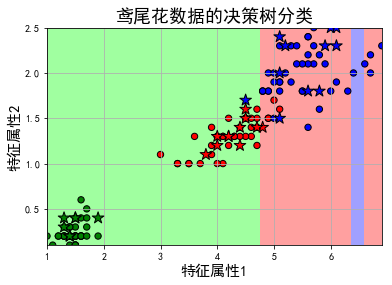

In [134]:
plt_light = mpl.colors.ListedColormap(['#A0FFA0', '#FFA0A0', '#A0A0FF'])
plt_dark = mpl.colors.ListedColormap(['g', 'r', 'b'])

plt.figure(facecolor='w')
## 画一个区域图（第一个参数是横坐标的值、第二个参数是纵坐标的值、第三个参数是坐标点对应的类别、第四个是各个类别分布使用什么现实进行现实）
plt.pcolormesh(x1, x2, y_show.reshape(x1.shape), cmap=plt_light) 
X_test_1 = X_test[:,2]
X_test_2 = X_test[:,3]
X_train_1 = X_train[:,2]
X_train_2 = X_train[:,3]
# 画测试数据的点信息(画五角星)
plt.scatter(X_test_1, X_test_2, c=Y_test.ravel(), edgecolors='k', s=150, zorder=10, cmap=plt_dark, marker='*')  # 测试数据
# # 画训练数据的点信息(画圆)
plt.scatter(X_train_1, X_train_2, c=Y_train.ravel(), edgecolors='k', s=40, cmap=plt_dark)  # 全部数据
plt.xlabel(u'特征属性1', fontsize=15)
plt.ylabel(u'特征属性2', fontsize=15)
plt.xlim(x1_min, x1_max)
plt.ylim(x2_min, x2_max)
plt.grid(True)
plt.title(u'鸢尾花数据的决策树分类', fontsize=18)
plt.show()